# Dimension reduction Data Visualization Notebook Gameplan

### Step 1: Normalization
- Create a `StandardScaler` object (`scaler`).
- Normalize the selected numeric columns using the scaler.
- Display the normalized data.

### Step 2: Principal Component Analysis (PCA)
- Extract features for PCA (`X`) and define feature list.
- Perform PCA with 3 components.
- Create a new dataframe with the principal components (`pc_df`).
- Plot a 3D scatter plot with different colors for each 'B.C.' category.
- Display the percentage variance, cumulative percentage variance, and eigenvalues for each principal component.

### Step 3: Outlier Detection
- Add z-score columns to the normalized dataframe.
- Identify outliers based on a threshold (e.g., z-score > 3).
- Display the outliers.
- Analyze the outliers based on the original dataframe (`original_outliers_data`).

### Step 4: Visualization with Marked Outliers
- Perform PCA with 2 components for visualization.
- Create a new dataframe with the principal components (`pc_df`).
- Plot a scatter plot with clusters and marked outliers.

### Step 5: PCA without Outliers
- Exclude identified outliers from the normalized dataframe.
- Perform PCA with 3 components without outliers.
- Create a new dataframe with the principal components without outliers (`pc_df_no_outliers`).
- Plot a 3D scatter plot without outliers.
- Display the percentage variance, cumulative percentage variance, and eigenvalues without outliers.

### Step 6: t-SNE Visualization
- Extract features for t-SNE (`X`) and define feature list.
- Perform t-SNE with 2 components.
- Create a new dataframe with t-SNE results (`tsne_df`).
- Plot a scatter plot with t-SNE results.




In [3]:
import pandas as pd
from google.colab import files

In [6]:
# Use pd.read_excel for Excel files
df = pd.read_excel('4BC.xlsx')

In [7]:
# Display basic information about the DataFrame
info_df = pd.DataFrame({
    'Column': df.columns,
    'Non-null Count': df.count().values,
    'Data Type': df.dtypes.values
})

print("\nInformation about the dataset:")
display(info_df)


Information about the dataset:


,Column,Non-null Count,Data Type
0,id,549,int64
1,B.C.,549,object
2,FF,549,float64
3,Rs,549,float64
4,Rsh,549,float64
5,VOC(mV),549,float64
6,jsc(µA/cm2),549,float64


In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your original dataframe
df_copy = df.copy()

# Select the columns to normalize (excluding non-numeric columns)
numeric_columns = df_copy.select_dtypes(include=['float64']).columns

# Display the original data
print("Original DataFrame:")
print(df.head())

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the selected columns
df_copy[numeric_columns] = scaler.fit_transform(df_copy[numeric_columns])

# Display the normalized data
print("\nNormalized DataFrame:")
print(df_copy.head())


Original DataFrame:
   id B.C.         FF            Rs          Rsh     VOC(mV)  jsc(µA/cm2)
0   1   Ag  42.050778    1201.02073  3207157.274  313.589943     9.080000
1   2   Ag  31.448339   23063.72733  1139940.919  305.736250    14.441089
2   3   Ag  44.528443   77754.33149  2474439.611  403.290236    14.900000
3   4   Ag  42.470062   60349.26229  2323488.838  402.432026    14.800000
4   5   Ag  42.710457  141620.04100  2582383.661  407.892966    13.500000

Normalized DataFrame:
   id B.C.        FF        Rs       Rsh   VOC(mV)  jsc(µA/cm2)
0   1   Ag -0.047251 -0.044176 -0.054967  0.347105    -0.366892
1   2   Ag -0.072308 -0.043991 -0.063403  0.275582     0.599729
2   3   Ag -0.041395 -0.043530 -0.057957  1.164003     0.682472
3   4   Ag -0.046260 -0.043677 -0.058573  1.156187     0.664442
4   5   Ag -0.045692 -0.042991 -0.057517  1.205919     0.430048


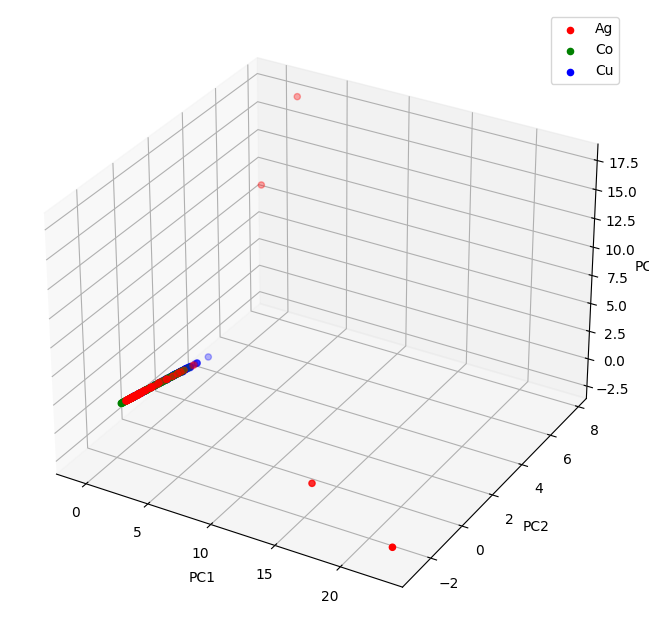

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

features = ['jsc(µA/cm2)', 'VOC(mV)', 'FF', 'Rsh', 'Rs']

# Extract the features for PCA
X = df_copy[features]

# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

# Create a new dataframe with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add the original 'B.C.' column to the new dataframe for coloring
pc_df['B.C.'] = df_copy['B.C.']

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each 'B.C.' category
for bc, color in zip(pc_df['B.C.'].unique(), ['r', 'g', 'b']):
    subset = pc_df[pc_df['B.C.'] == bc]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=bc)

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set legend
ax.legend()

# Show the plot
plt.show()


In [24]:
# Percentage variance of each PC
explained_variance_ratio = pca.explained_variance_ratio_
print("Percentage variance of each PC:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance * 100:.2f}%")

# Cumulative percentage variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print("\nCumulative percentage variance:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio):
    print(f"PC{i+1}: {cumulative_variance * 100:.2f}%")

# Eigenvalues
eigenvalues = pca.explained_variance_
print("\nEigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"PC{i+1}: {eigenvalue:.4f}")


Percentage variance of each PC:
PC1: 29.59%
PC2: 25.89%
PC3: 19.90%

Cumulative percentage variance:
PC1: 29.59%
PC2: 55.48%
PC3: 75.38%

Eigenvalues:
PC1: 1.4821
PC2: 1.2969
PC3: 0.9967


In [25]:
from scipy.stats import zscore

# Add z-score columns to the normalized dataframe
df_copy['Zscore_PC1'] = zscore(pc_df['PC1'])
df_copy['Zscore_PC2'] = zscore(pc_df['PC2'])
df_copy['Zscore_PC3'] = zscore(pc_df['PC3'])

# Identify outliers based on a threshold (e.g., z-score > 3)
outliers = df_copy[(abs(df_copy['Zscore_PC1']) > 3) | (abs(df_copy['Zscore_PC2']) > 3) | (abs(df_copy['Zscore_PC3']) > 3)]

# Display the outliers
print("Outliers:")
print(outliers)

# Analyze the outliers based on the original dataframe (df)
original_outliers_data = df[df['id'].isin(outliers['id'])]

# Display the data from the original dataframe for outliers
print("\nOriginal Data for Outliers:")
print(original_outliers_data)


Outliers:
      id B.C.         FF         Rs        Rsh   VOC(mV)  jsc(µA/cm2)  \
89    90   Ag  -0.146629  -0.044063  21.346675 -2.508748    -2.004045   
91    92   Ag  -0.146629  23.409096   9.567953 -2.508748    -2.004045   
100  101   Ag  19.402678  -0.041180  -0.068027 -2.492082    -0.092831   
104  105   Ag  13.054260  -0.040963  -0.068042 -2.500560    -0.038740   
391  392   Cu  -0.054945  -0.043990  -0.065522 -0.684970     5.153990   

           PC1       PC2        PC3  Zscore_PC1  Zscore_PC2  Zscore_PC3  
89   15.377856 -1.819377  -0.716285   12.642908   -1.599047   -0.718123  
91   22.938769 -2.971061  -1.944765   18.859114   -2.611261   -1.949753  
100   1.914366  7.800951  17.463039    1.573897    6.856244   17.507829  
104   1.501146  5.814490  11.706414    1.234167    5.110346   11.736439  
391  -0.510901  3.858730  -2.207124   -0.420037    3.391432   -2.212785  

Original Data for Outliers:
      id B.C.           FF            Rs           Rsh     VOC(mV)  \
89    90

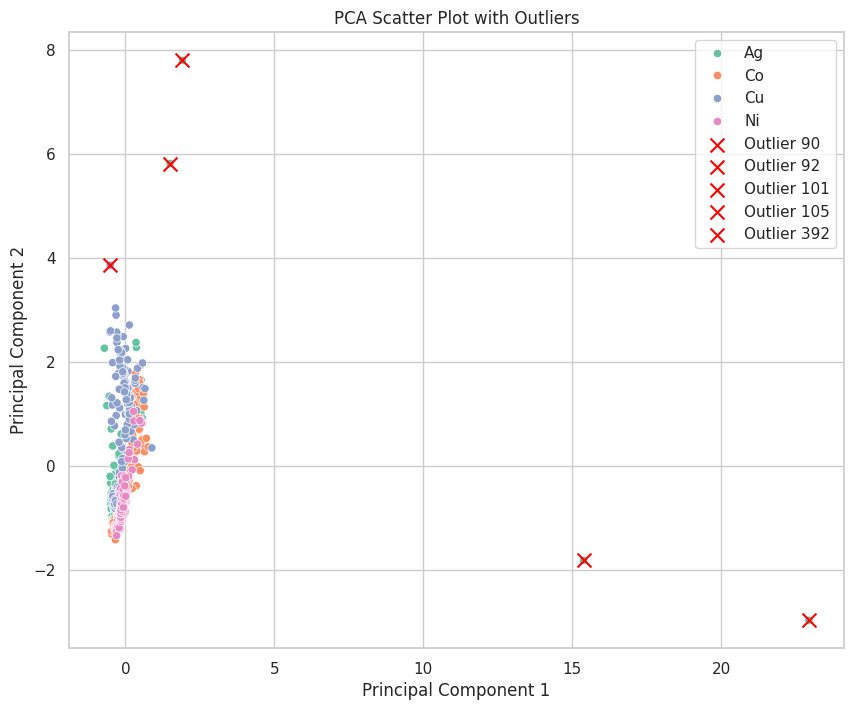

In [53]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a new dataframe with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the original 'B.C.' column and 'id' for labeling outliers
pc_df['B.C.'] = df_copy['B.C.']
pc_df['id'] = df_copy['id']

# Plot the scatter plot with clusters and marked outliers
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='B.C.', data=pc_df, palette='Set2', legend='full')

# Mark outliers with red 'X'
outliers = [90, 92, 101, 105, 392]
for outlier_id in outliers:
    outlier_data = pc_df[pc_df['id'] == outlier_id]
    plt.scatter(outlier_data['PC1'], outlier_data['PC2'], color='red', marker='x', s=100, label=f'Outlier {outlier_id}')

# Set plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Outliers')
plt.legend()
plt.show()

### Outlier Analysis

1. **Outlier 1 (id=90):**
   - **Findings:** Extremely high Rs and Rsh, zero VOC and jsc.
   - **Comments:** Potential data issues with zero VOC and jsc, and unusually high Rs and Rsh.

2. **Outlier 2 (id=92):**
   - **Findings:** Extremely high Rs and Rsh, zero VOC and jsc.
   - **Comments:** Similar to outlier 90, concerns about data integrity due to zero VOC and jsc.

3. **Outlier 3 (id=101):**
   - **Findings:** Extremely high FF, low Rs, and zero VOC and jsc.
   - **Comments:** Notable FF and low Rs; investigate the impact of zero VOC and jsc.

4. **Outlier 4 (id=105):**
   - **Findings:** High FF, low Rs, low VOC, and zero jsc.
   - **Comments:** Similar to outlier 101, with additional low VOC and zero jsc.

5. **Outlier 5 (id=392):**
   - **Findings:** Relatively high FF, Rs, and Rsh, non-zero VOC and jsc.
   - **Comments:** Unique characteristics; less extreme but still distinct from other outliers.


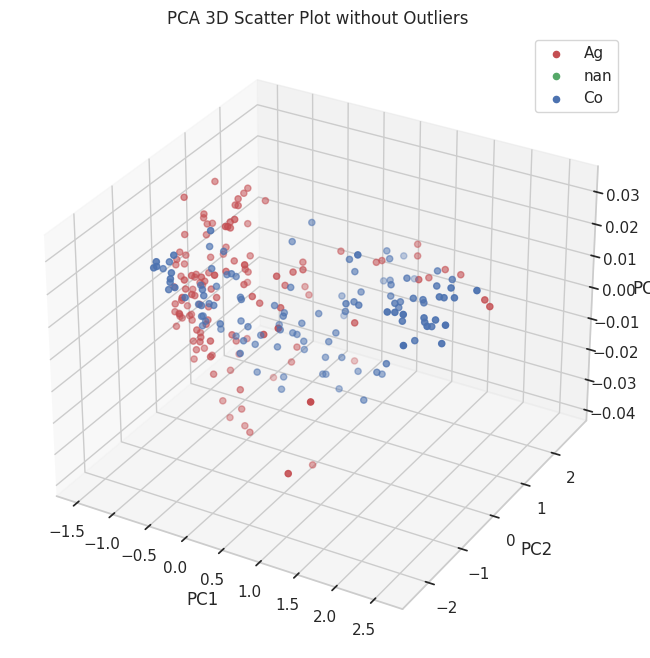

In [56]:
# Features for PCA
features = ['jsc(µA/cm2)', 'VOC(mV)', 'FF', 'Rsh', 'Rs']

# Extract the features for PCA
X = df_copy[features]

# Exclude outliers
outliers = [90, 92, 101, 105, 392]
X_no_outliers = df_copy[~df_copy['id'].isin(outliers)][features]

# Perform PCA with 3 components without outliers
pca_no_outliers = PCA(n_components=3)
principal_components_no_outliers = pca_no_outliers.fit_transform(X_no_outliers)

# Create a new dataframe with the principal components without outliers
pc_df_no_outliers = pd.DataFrame(data=principal_components_no_outliers, columns=['PC1', 'PC2', 'PC3'])

# Add the original 'B.C.' column to the new dataframe for coloring
pc_df_no_outliers['B.C.'] = df_copy[~df_copy['id'].isin(outliers)]['B.C.']

# Create a 3D plot without outliers
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each 'B.C.' category
for bc, color in zip(pc_df_no_outliers['B.C.'].unique(), ['r', 'g', 'b']):
    subset = pc_df_no_outliers[pc_df_no_outliers['B.C.'] == bc]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=bc)

# Set axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Set legend
ax.legend()

# Show the plot without outliers
plt.title('PCA 3D Scatter Plot without Outliers')
plt.show()

In [57]:
# Percentage variance of each PC
explained_variance_ratio_no_outliers = pca_no_outliers.explained_variance_ratio_
print("Percentage variance of each PC without outliers:")
for i, variance in enumerate(explained_variance_ratio_no_outliers):
    print(f"PC{i+1}: {variance * 100:.2f}%")

# Cumulative percentage variance
cumulative_variance_ratio_no_outliers = explained_variance_ratio_no_outliers.cumsum()
print("\nCumulative percentage variance without outliers:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio_no_outliers):
    print(f"PC{i+1}: {cumulative_variance * 100:.2f}%")

# Eigenvalues
eigenvalues_no_outliers = pca_no_outliers.explained_variance_
print("\nEigenvalues without outliers:")
for i, eigenvalue in enumerate(eigenvalues_no_outliers):
    print(f"PC{i+1}: {eigenvalue:.4f}")


Percentage variance of each PC without outliers:
PC1: 64.62%
PC2: 35.36%
PC3: 0.01%

Cumulative percentage variance without outliers:
PC1: 64.62%
PC2: 99.98%
PC3: 100.00%

Eigenvalues without outliers:
PC1: 1.2351
PC2: 0.6760
PC3: 0.0003


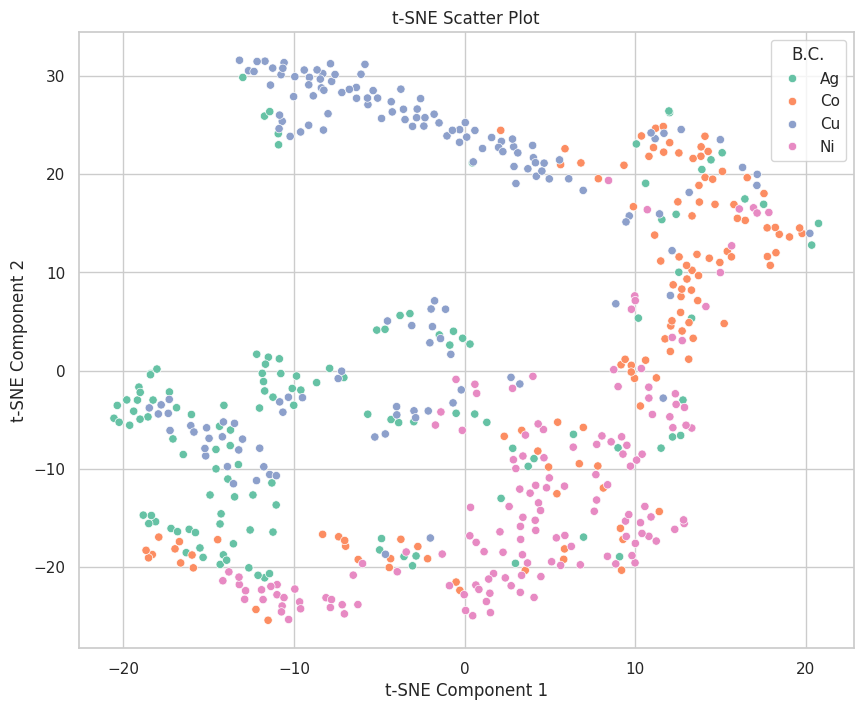

In [59]:
from sklearn.manifold import TSNE

# Features for t-SNE
features = ['jsc(µA/cm2)', 'VOC(mV)', 'FF', 'Rsh', 'Rs']

# Extract the features for t-SNE
X = df_copy[features]

# Perform t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Create a new dataframe with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])

# Add the original 'B.C.' column to the new dataframe for coloring
tsne_df['B.C.'] = df_copy['B.C.']

# Plot the scatter plot with t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='B.C.', data=tsne_df, palette='Set2', legend='full')

# Set plot labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot')

# Show the plot
plt.show()


**PCA:**

- PCA is primarily used for dimensionality reduction and capturing the maximum variance in the data.
- It provides a linear transformation of the original features, preserving global structure.
- Suitable for identifying major trends and reducing noise in the data.
- The percentage variance explained by each PC gives insights into the importance of each dimension.

**t-SNE:**

- t-SNE is focused on visualizing high-dimensional data in a lower-dimensional space, emphasizing local structure and pairwise similarities.
- Non-linear technique that aims to preserve the similarity relationships between data points.
- Well-suited for exploring clusters and identifying patterns in the data, especially in complex structures.
